In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as mpl
%matplotlib inline

In [2]:
# Choice of data
#I chose to use historical data of Ripple price in USD (from Yahoo Finance). 
#The primary collected data was Ripple historical price from 21-May-2015 to 28-Jan-2018.

df = pd.read_csv('XRP-USD.csv',index_col='Date')

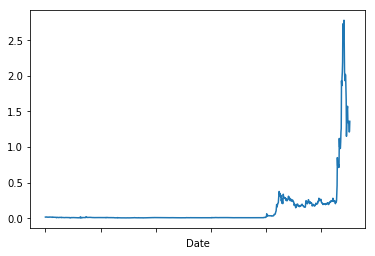

In [3]:
# Below is the plot of Ripple price during this period:
df['Adj Close'].plot()

In [5]:
df['Return'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))

In [6]:
df = df.loc['20160330':,:]

In [ ]:
# Considering the nature of data, we model and predict the future price using only information contained in their own past value (historical price).
# The historical adjusted closing price of Ripple (in USD) is recorded as an univariate time series.

In [7]:
training = df.loc[:'20171231',:]

In [8]:
testing = df.loc['20170101':,:]

In [ ]:
# The collected data begins with time stamp from 21 Jan 2015, however Ripple coins started to be actively traded from Jan 2017.
# Therefore, we only select data from 1 Jan 2017 to 31 Dec 2017 to use as our training dataset. 
# The second dataset which consists of 28 observations of the first 28 days in January 2018 is used as testing data.

<h1>Autocorrelation

In [ ]:
# I check the autocorrelation of the data in order to define the best model for prediction

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

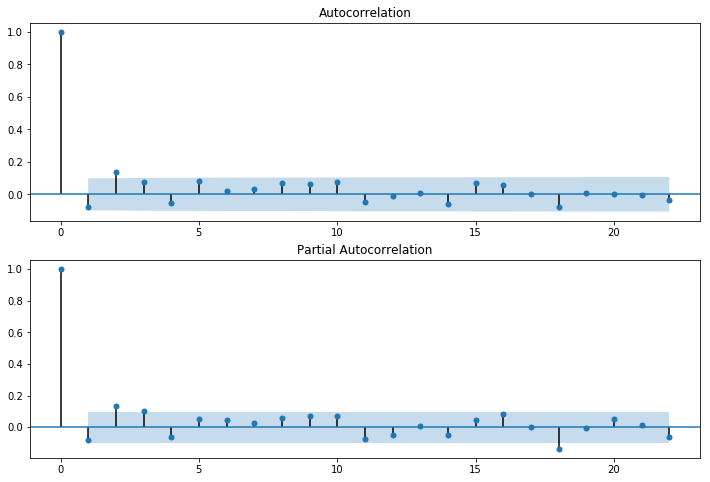

In [10]:
fig = mpl.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Return'].dropna(),lags=22,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Return'].dropna(),lags=22,ax=ax2)
fig.savefig('acf22.png',dpi=2000)

<h1>ARMA

In [ ]:
#ARMA model is chosen. p and q are lags of the model, which is selected based on AIC and BIC. 
#We selected the optimal lags for AR and MA by running different regressions from (0,0) to (7,7).

In [11]:
p_max=7
q_max=7

In [12]:
p_list = []
q_list = []
AIC_list = []
BIC_list = []

In [13]:
minAIC = 0
minBIC = 0
pminAIC = 0
pminBIC = 0
qminAIC = 0
qminBIC = 0

In [14]:
for p in range (0,p_max):
    for q in range (0,q_max):
        try:
            model = sm.tsa.ARMA(training['Return'].dropna(),order=(p,q))
            results = model.fit(maxiter=10000)
            p_list.append(p)
            q_list.append(q)
            AIC_list.append(results.aic)
            BIC_list.append(results.bic)
            if minAIC>results.aic:
                minAIC = results.aic
                pminAIC = p
                qminAIC = q
            if minBIC>results.bic:
                minBIC = results.bic
                pminBIC = p
                qminBIC = q
        except:
            continue

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [15]:
results = {'p':p_list,'q':q_list,'AIC':AIC_list,'BIC':BIC_list}

In [16]:
models = pd.DataFrame(data=results)

In [17]:
models['AIC'] = models['AIC']/len(df)

In [18]:
models['BIC'] = models['BIC']/len(df)

In [19]:
models

,p,q,AIC,BIC
0,0,0,-1.370334,-1.350488
1,0,1,-1.372449,-1.342679
2,0,2,-1.401290,-1.361596
3,0,3,-1.399480,-1.349863
4,0,4,-1.396243,-1.336703
5,0,5,-1.393750,-1.324286
6,0,6,-1.389099,-1.309712
7,1,0,-1.374823,-1.345053
8,1,1,-1.375727,-1.336033
9,1,2,-1.398375,-1.348758


In [20]:
Str_conclusion = 'According to AIC, the minimum AIC value is '+str(minAIC/len(df))+' at p='+str(pminAIC)+' and q='+str(qminAIC)+'.\n'+'According to BIC, the minimum BIC value is '+str(minBIC/len(df))+' at p='+str(pminBIC)+' and q='+str(qminBIC)+'.\n'
with open("ARMA_chosen_model.txt", "w") as text_file:
        print(Str_conclusion, file=text_file)
Str_conclusion

'According to AIC, the minimum AIC value is -1.4017155557762289 at p=5 and q=2.\nAccording to BIC, the minimum BIC value is -1.3615964427733025 at p=0 and q=2.\n'

<h1>Model Statistics

<h3>p=0, q=2

In [ ]:
#The optimal lags selected is p =0 and q=2, at which BIC has the minimum value of -1.36159644277.

In [21]:
model = sm.tsa.ARMA(df['Return'].dropna(),order=(pminBIC,qminBIC))
res = model.fit(maxiter=1000)

Str_conclusion = str(res.summary())
with open("ARMA_summary.txt", "w") as text_file:
        print(Str_conclusion, file=text_file)
Str_conclusion

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


'                              ARMA Model Results                              \n==============================================================================\nDep. Variable:                 Return   No. Observations:                  393\nModel:                     ARMA(0, 2)   Log Likelihood                 297.894\nMethod:                       css-mle   S.D. of innovations              0.113\nDate:                Wed, 15 Aug 2018   AIC                           -587.787\nTime:                        20:14:21   BIC                           -571.892\nSample:                             0   HQIC                          -581.488\n                                                                              \n================================================================================\n                   coef    std err          z      P>|z|      [0.025      0.975]\n--------------------------------------------------------------------------------\nconst            0.0136      0.00

<h1>Model Diagnostics

<h3>p=0, q=2

In [22]:
from statsmodels.stats.diagnostic import acorr_ljungbox as LB

In [23]:
result = [pd.Series(range(1,11)),pd.Series(LB(res.resid,lags=10)[0])]
Lbt = pd.concat(result,axis=1)
Lbt.columns=['lags','Test Result']

In [24]:
Lbt.to_excel('Ljung-Box Test.xls')

In [25]:
from statsmodels.stats.stattools import jarque_bera as JB

In [26]:
result = JB(res.resid)
JBResult = 'Jarque-Bera: '+ str(result[0])+'\n p-value:' + str(result[1])+'\n Skewness:' + str(result[2])+'\n Kurtosis:' + str(result[3])
with open("Jarque-Bera.txt", "w") as text_file:
        print(JBResult, file=text_file)

<h1>Forecast

<h3>p=0,q=2

In [27]:
first_day = 0
forecast_day = len(training)
forecast = []
last_day = len(testing)

In [28]:
for i in range(0,last_day):
    try:
        in_sample = df.iloc[first_day:forecast_day-1]
        model = sm.tsa.ARMA(in_sample['Return'].dropna(),order=(0,2))
        res = model.fit(maxiter=10000)
        fore = res.forecast(1)[0][0]
        forecast.append(fore)
    except:
        forecast.append(forecast[-1])
    first_day = first_day+1
    forecast_day = forecast_day+1

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [29]:
forecast_data = pd.Series(data=forecast,index=testing.index)
testing = pd.concat([testing,forecast_data],axis=1)

In [30]:
testing.rename(columns={0:'Forecast'},inplace=True)

In [31]:
testing['Forecast Price'] = np.exp(testing['Forecast'])*testing['Adj Close'].shift(1)

In [32]:
testing.loc['2018-01-01','Forecast Price'] = np.exp(testing['Forecast'].iloc[0])*training['Adj Close'].iloc[-1]

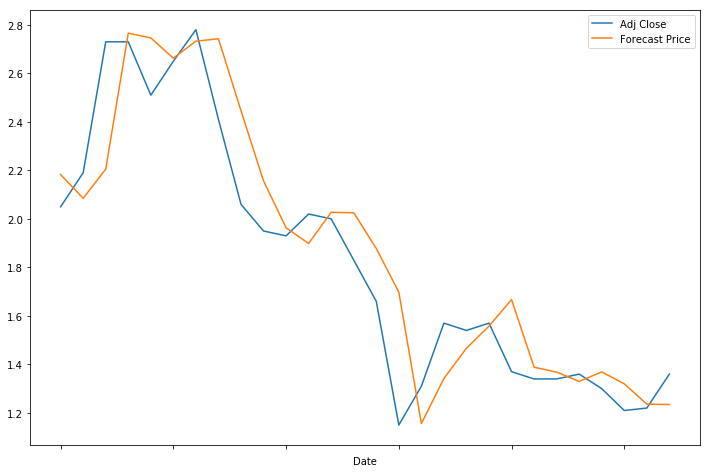

In [33]:
#The graph below shows the forecast of Adj Close price. 
#The forecasted results are quite closed to the real price from testing data. The differences
#between forecasted and real price are not significant in the forecasting period (~5 cents
#average). Comparing the data in my model and data in the real market, it can be concluded 
#that my model is robust and reliable. Therefore, this model can be applied in other similar situation,
#for example when I want to check the fluctuation of other crypto-currencies.

testing[['Adj Close','Forecast Price']].plot(figsize=(12,8))

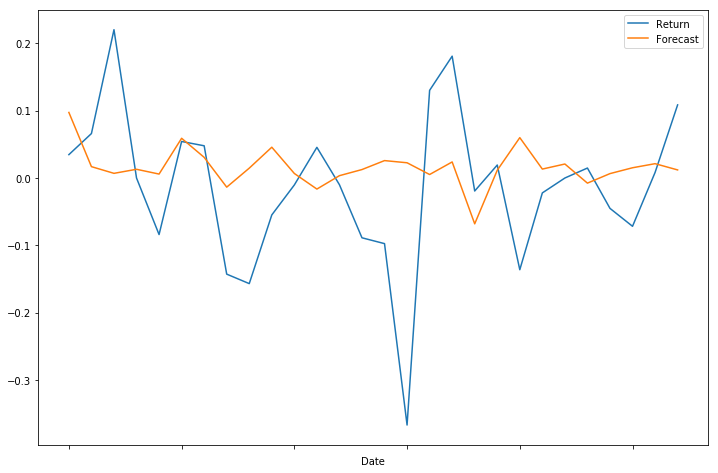

In [34]:
testing[['Return','Forecast']].plot(figsize=(12,8))

In [35]:
testing

,Open,High,Low,Close,Adj Close,Volume,Return,Forecast,Forecast Price
Date,,,,,,,,,
2018-01-01,1.98,2.09,1.8100,2.05,2.05,232757444,0.034743,0.097424,2.182609
2018-01-02,2.05,2.21,1.8900,2.19,2.19,418605330,0.066062,0.016883,2.084904
2018-01-03,2.19,2.85,2.1500,2.73,2.73,986250815,0.220400,0.006936,2.205242
2018-01-04,2.73,3.29,2.5800,2.73,2.73,1299128128,0.000000,0.012970,2.765639
2018-01-05,2.73,3.05,2.2400,2.51,2.51,1002020058,-0.084019,0.005863,2.746053
2018-01-06,2.51,2.85,2.4600,2.65,2.65,398736590,0.054277,0.059034,2.662638
2018-01-07,2.65,2.82,2.5800,2.78,2.78,272359641,0.047891,0.030720,2.732673
2018-01-08,2.78,2.78,1.9300,2.41,2.41,535353427,-0.142824,-0.013567,2.742539
2018-01-09,2.41,2.50,1.9200,2.06,2.06,480316287,-0.156921,0.014659,2.445589


<h1> Alternative method: Naive Forecast

In [36]:
testing['Naive Return'] = testing['Return'].shift(1)
ix = testing.columns.get_loc('Naive Return')
testing.iloc[0,ix] = training['Return'].iloc[-1]

In [37]:
testing['Naive'] = np.exp(testing['Naive Return'])*testing['Adj Close'].shift(1)

In [38]:
testing.loc['2018-01-01','Naive'] = np.exp(testing['Naive Return'].iloc[0])*training['Adj Close'].iloc[-1]

In [39]:
testing

,Open,High,Low,Close,Adj Close,Volume,Return,Forecast,Forecast Price,Naive Return,Naive
Date,,,,,,,,,,,
2018-01-01,1.98,2.09,1.8100,2.05,2.05,232757444,0.034743,0.097424,2.182609,0.062520,2.107742
2018-01-02,2.05,2.21,1.8900,2.19,2.19,418605330,0.066062,0.016883,2.084904,0.034743,2.122475
2018-01-03,2.19,2.85,2.1500,2.73,2.73,986250815,0.220400,0.006936,2.205242,0.066062,2.339561
2018-01-04,2.73,3.29,2.5800,2.73,2.73,1299128128,0.000000,0.012970,2.765639,0.220400,3.403151
2018-01-05,2.73,3.05,2.2400,2.51,2.51,1002020058,-0.084019,0.005863,2.746053,0.000000,2.730000
2018-01-06,2.51,2.85,2.4600,2.65,2.65,398736590,0.054277,0.059034,2.662638,-0.084019,2.307729
2018-01-07,2.65,2.82,2.5800,2.78,2.78,272359641,0.047891,0.030720,2.732673,0.054277,2.797809
2018-01-08,2.78,2.78,1.9300,2.41,2.41,535353427,-0.142824,-0.013567,2.742539,0.047891,2.916377
2018-01-09,2.41,2.50,1.9200,2.06,2.06,480316287,-0.156921,0.014659,2.445589,-0.142824,2.089245


In [40]:
testing.to_excel('forecast_AIC.xls')

<h1>Cost Functions

In [41]:
MAE_ARMA = np.average(np.abs(testing['Adj Close']-testing['Forecast Price']))
Sum_Square = (testing['Adj Close']-testing['Forecast Price'])**2
RMSE_ARMA = np.sqrt(np.average(Sum_Square))

In [42]:
MAE_naive = np.average(np.abs(testing['Adj Close']-testing['Naive']))
Sum_Square_naive = (testing['Adj Close']-testing['Naive'])**2
RMSE_naive = np.sqrt(np.average(Sum_Square_naive))

In [43]:
MAE_ARMA

0.1554772087787125

In [44]:
MAE_naive

0.18126611689683272

In [45]:
RMSE_ARMA

0.21333282443152143

In [46]:
RMSE_naive

0.2501558672638137

In [47]:
#We can see that ARMA has lower errors for both RMSE and MAE, though the gaps are not too significant. 
#We can conclude that generally, ARMA gives better forecasting results than Naive for our dataset.

In [ ]:
#Based on the above result, it is recommended to use ARMA model for forecasting the price 
#of crypto-coin because ARMA model provides the better result for cost function in this case.